# Mads Lind



# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np
import pandas as pd

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

##### Answer Ex.11.1.1 

In the SIS model we have 2 states, Susceptible and infectious. Every period we must have that a fraction of the susceptible people is getting infectect with the rate $\beta S I $ and a fraction of the infected is getting susceptible again with the rate $\gamma I$. With a population of S+I=n people with the infection rate $\beta$ and the recovery rate $\gamma$ we have the fallowing first order conditions. 

The change in the susceptible is given by:

(1)   $\frac{dS}{dt}=\gamma I-\beta S I $

The change in the infectious is given by:

(2)  $\frac{dI}{dt}=\beta S I - \gamma I$


So we need 2 equations to explain the SIS model, since there is only to states. 
Equation (1) is the the fraction of susceptible people in the population who gets sick every period. 
Equation (2) is the the fraction of infectious people in the population who is recovering every period, but since there is no form of resistensy all people who is recovering is again susceptible.

 $\beta$ is a disease-specific constant and is in some sense the infection rate, and is determine how big a fractrion of the susceptible people who will get infected every period. A high value of beta means that many people in every period will move from the susceptible state to the infectiuos state and vice versa. $\gamma$ is  in some sense the recovery rate and is determine how many people who is recovering from the infectious state in every periode to the (in the SIS model) to the susceptible state. A high gamma means that many many people is recovering from the the disease every periode and vice versa.
 


> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

In the SIRS model there is 3 states where people is moving from Susceptible $\rightarrow$ Infectious $\rightarrow$ Recovered $\rightarrow$ Susceptible. 

We have to introduce the constant $\rho$ which is the fraction of people who is resistent in the recovered state thats is moving to be susceptible again in the susceptilbe state. 


Equation for the SIRS model:


(1)    $\frac{dS}{dt} =\rho R -\beta SI$


(2)    $\frac{dI}{dt} = \beta SI - \gamma I$


(3)    $\frac{dR}{dt} = \gamma I - \rho R$


> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

###### Answer EX. 11.1.3

The three stategies is on the webside decribed as follows:

strategy A: A set of nodes is chosen at random and vaccinated
strategy B: The most connected nodes are chosen and vaccinated
strategy C: A set of nodes is chosen at random and then one of each node's neighbors is vaccinated

I have found the answers by playing around with the BA network. 

1. With strategy A the vacination procent must be around 70-80 % to get around 10 infected. The number of infected is variating, so it is hard to determine the percentage of people to vaccinate for sure. With strategy B the procentage to vactinate is around 20 % of the population to get around 10 infected people. With stategy C the procentage to vacinate is around 50 %. Overall it is hard to say the exact procentage to vactinate to  only get 10 people who is infected, since the result is variating. But we can from the results conclude that the procentage to vacinate to get around 10 infected is higher for Strategy A than B and C. And the procentages to vacinate is lower for Strategy B than A and C.   


2. As decribed above strategy C is more effective that strategy A. Strategy C is using random neighbors, where a node is chosen randomly and one of the nodes neighbors is vacinated. Dirk Brockmann is decribing that the reason strategy C is more effective than strategy A is due to the friendship paradox. So by chosing to vaccinate a random neighbor to a random node, the probability of chosing a node with a higher degree is increasing, which makes the strategy more effective. 


3. Dirk Brockmann decribes that the BA network has a stronger variation in the node degree than the ER network. Because of stronger variation in the node degree in the BA network, the result of using the different strategies will be larger. Since strategy B and C is depending on the node degree. 


> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

###### Answer EX. 11.1.4

Since we have been talking about the SIRS model I have chosen explorable 2 which is a simulation of the SIRS model. 

In the model we have 3 parameters, the transmisson rate equivalent to $\beta SI$ in the model above, the recovery rate equivalent to $\gamma I$ in the model above and last the waning immunity rate equivalent to $\rho R$ in the model above. Furthermore, we can adjust the population and split the the population into 1, 2 or 4 populations, where a few people is moving between the populations. 

In the simulation the susceptible people is illustrated by with figures and the infected by red and the recovered by gray figures. 

The different rates are chosen and when running the simulation 400 people is moving between the different states according to the rates there has been set. 

By altering the 3 parameters it is possible to see how low or high values of the parameters means for the spreading of the disease. Fx. a low value of the waning immunity rate implies that only a few people is getting susceptible again every periode after being recovered, few sick people in every point in time giving the two other parameters is moderate. 

In some cases the model is a internal loop where people is getting infected, is recovering and then getting susceptible agian. But in other cases (combinations of the parameters) either everybody is getting infected eventually or the disease is getting extinguished and all the 400 people is ending up susceptible, but the disease is not flourishing the population. 

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [2]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

In [ ]:
#p_I = 0.1
#n_iter = 200

#I = set()
#S = set(G.nodes())

#patient0 = np.random.choice(list(S))

#I.add(patient0)
#S.remove(patient0)

#for t in range(n_iter):
 #   for infected_node in list(I):
  #      neighbors = G.neighbors(infected_node)
 #       infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
  #      I |= infected_neighbors
   #     S -= infected_neighbors

Comments to the code: 

p_I is the fraction there is infected in each periode. 
n_iter is the number of times the model is simulated. 

Afterwards the number of nodes in the the susceptible state is set to the network G which is defined above. The patient0 is the selected randomly from the list of nodes in S. Then this node is added to the infected list I and removed for the list of susceptible nodes S. 

The there is created a loop for n_iter simulations. Where the infected nodes neighbors is infected with the probability 0.1. for every time. I is now equavalent to the infected neigjbors or just I. Then S is equal to S substracted the infected neighbors. 

In [3]:
#To create a plot of the fraction of the infected over time i have to add a
# list mesuring the fraction of infected in each iteration.

p_I = 0.1
n_iter = 200

I = set()
S = set(G.nodes())

N=len(G.nodes())
frac_I=[len(I)/N]

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors
        frac_I.append(len(I)/N)

Text(0, 0.5, 'Infection share')

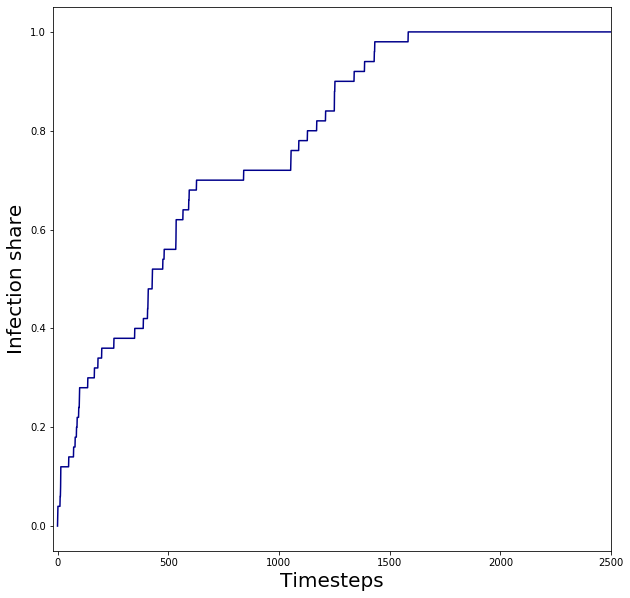

In [31]:
ax=plt.subplots(figsize=(10, 10))
ax=plt.subplot()
ax.plot(frac_I, color='Darkblue')
plt.xlim(-20,2500)
ax.set_xlabel('Timesteps', fontsize=20)
ax.set_ylabel('Infection share', fontsize=20)

In the figure above is illustrating the fraction of infected over time. we can see that the fraction is increasing until all S=0 and all the individuals are infected, since it is a SI model no one is recovering from the disease, so the development of the fraction of infected is as expected.

In the last subquestion we have to "Extend the code such after a variable number of timesteps T_I infected nodes become susceptible again. Set T_I = 10 to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see". By implenting T_I infected nodes who is getting susceptible again we will have a SIS model. To implement this we have to add to our function that after a number of timesteps T_I infected people is getting susceptible again. So as the given code, we have to remove some infected nodes and adding some susceptible nodes. 

(To get it to work i have used the Class RingBuffer you have decribed. But i would never have come up with this myself. but i understands why it is important to to make such to insure the history of the infected is kept and is taking into account.) 



In [6]:
class RingBuffer:
    def __init__(self,length):
        self.length = length
        self.data = [None]*length
    def add(self,value):
        if len(self.data) < self.length:
            self.data.insert(0,value)
        else:
            self.data = self.data[:-1]
            self.data.insert(0,value)
            
    def take(self):
        return self.data.pop()

In [26]:
p_I = 0.1
n_iter = 200
T_I=10

I = set()
S = set(G.nodes())

rb=RingBuffer(T_I)

N=len(G.nodes())
frac_SIS=[len(I)/N]

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
       
        
        new_infected=infected_neighbors-I
        rb.add(new_infected)
        recoveries = rb.take()
        
        if recoveries is not None:
            S|= recoveries
            I-=recoveries  
        
        
        I |= infected_neighbors
        S -= infected_neighbors
        
        frac_SIS.append(len(I)/N)
        
    

Text(0, 0.5, 'Infection share')

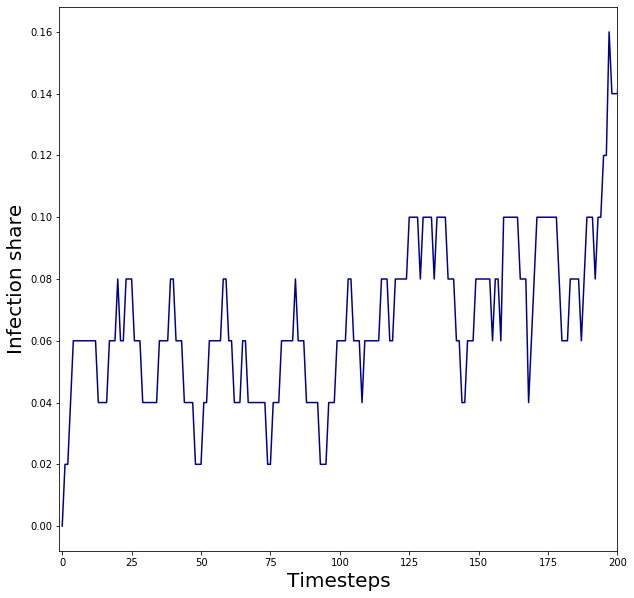

In [32]:
ax=plt.subplots(figsize=(10, 10))
ax=plt.subplot()
ax.plot(frac_SIS, color='Darkblue')
plt.xlim(-1,200)
ax.set_xlabel('Timesteps', fontsize=20)
ax.set_ylabel('Infection share', fontsize=20)

The result after implementing a recovery rate seems to make sense. after the first 10 timeteps. People is beginning to recover from the disease, so we are getting an infection share that is variating over time, since people are getting infected but a some is also recovering. 

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [3]:
## we now have to implement the SIRS model on the facebook data. Starting by loading the facebook data
data = pd.read_csv(
    "facebook-wall.txt.anon",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

t0 = data.timestamp.min()  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.Graph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.Graph)

In [8]:
p_I = 0.1
p_S=0.005
p_R=0.03

n_iter = 200


I = set()
S = set(G_t.nodes())
R= set()


N=len(G_t.nodes())
frac_Infected=[len(I)/N]
frac_Susceptible=[len(S)/N]
frac_Recovered=[len(R)/N]

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    
    for infected_node in list(I):
        neighbors = G_t.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        recovered = set([n for n in I if np.random.random() < p_R])
        Susceptible = set([n for n in R if np.random.random()<p_S])
        #The SIRS models 3 states where the new infected is the infected neighbors, which leads
        #to a decline in the susceptible by the number of infected neighbors. Then the infected is
        #declining with the amount there is recovered, and the recovcered state is increasing by the
        #amount there us recovered. In the end the recovered is declined by the amount of the recovered
        #there is becoming Susceptible again and the Susceptible is increasing wiht the same amount.
        I |= infected_neighbors
        S -= infected_neighbors    
        I-=recovered
        R |=recovered 
        R -=Susceptible
        S|= Susceptible
        
        frac_Infected.append(len(I)/N)
        frac_Recovered.append(len(R)/N)
        frac_Susceptible.append(len(S)/N)

Text(0, 0.5, 'Share')

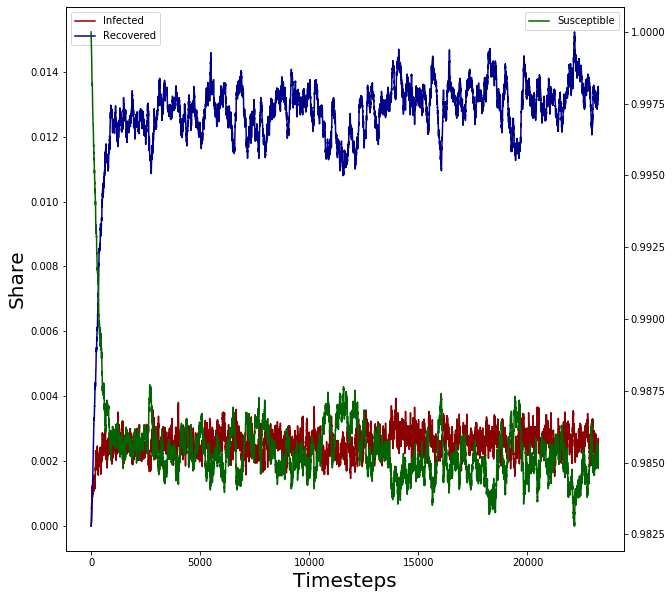

In [19]:
ax=plt.subplots(figsize=(10, 10))
ax=plt.subplot()
ax
ax.plot(frac_Infected, color='DarkRed', label='Infected')
ax.plot(frac_Recovered, color='DarkBlue', label='Recovered')
ax1 = ax.twinx()
ax1.plot(frac_Susceptible, color='Darkgreen', label='Susceptible')
ax1.legend()
ax.legend()
ax.set_xlabel('Timesteps', fontsize=20)
ax.set_ylabel('Share', fontsize=20)


The result is depending on how the parameters is set. With the ones I have chosen the results shares seems to be pretty stable over time. This is maybe also due to the low degree of nodes in the facebook data. 

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.